In [1]:
# Importing all libraries.
from pylab import *
from netCDF4 import Dataset
%matplotlib inline
import os
import cmocean as cm
from trackeddy.tracking import *
from trackeddy.datastruct import *
from trackeddy.geometryfunc import *
from trackeddy.init import *
from trackeddy.physics import *
from trackeddy.plotfunc import *

#import cosima_cookbook as cc

In [2]:
# Output data path
outputpath='/g/data/v45/akm157/model_output/mom/mom01v5_kds75/output306/'
# Import SSH values to python environment.
ncfile=Dataset(outputpath+'rregionsouthern_ocean_daily_eta_t.nc')
eta=ncfile.variables['eta_t'][:]*100
# Import geographic coordinates (Lon,Lat)
lon=ncfile.variables['xt_ocean_sub01'][:]
lat=ncfile.variables['yt_ocean_sub01'][:]

In [3]:
# Import SSH 10 yrs mean values to python environment.
ncfile=Dataset('/home/156/jm5970/notebooks/traceddy/data.output/meanssh_10yrs_AEXP.nc')
ssh_mean=squeeze(ncfile.variables['SSH_mean'][:])
# Import geographic coordinates (Lon,Lat)
lon=ncfile.variables['Longitude'][:]
lat=ncfile.variables['Latitude'][:]

In [4]:
###This mask is necessary to remask each time step, 
#It's not necesary if your mask is good in all the time steps
mask=ma.getmask(eta[0,:,:])

In [5]:
#Area in indexes, probably in the future it will be added an option for lon - lat coords.
areamap=array([[0,len(lon)],[0,len(lat)]])

#eta=eta[:,400:600,500:1000]
#ssh_mean=ssh_mean[400:600,500:1000]
#print(shape(eta),shape(ssh_mean))
#lon=lon[500:1000]
#lat=lat[400:600]

In [6]:
# If you want to Analyse multiple levels, please go to the Moving in Z section.
eddytd=analyseddyt(eta,lon,lat,level=10,t0=0,t1=1,tstep=1,data_meant=ssh_mean,\
                   areamap=areamap,mask='',destdir='',physics='',\
                   eddycenter='maximum',diagnostics=False,pprint=False)

 0% [>]100% Time Elapsed: 4 s  

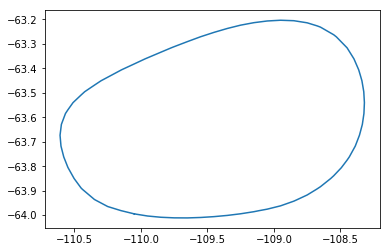

In [104]:
plot(eddytd['eddyn_5']['contour'][0][0],eddytd['eddyn_5']['contour'][0][1])

In [136]:
contcoordx=eddytd['eddyn_5']['contour'][0][0]
contcoordy=eddytd['eddyn_5']['contour'][0][1]
idxcheckmax,idycheckmax=find2d(x,y,contcoordx.max(),contcoordy.max())
idxcheckmin,idycheckmin=find2d(x,y,contcoordx.min(),contcoordy.min())
var=eta
x=lon
y=lat
levels=[10]
date=0

In [137]:
x_c,y_c=centroidvalue(contcoordx,contcoordy,var,x,y,levels,date)

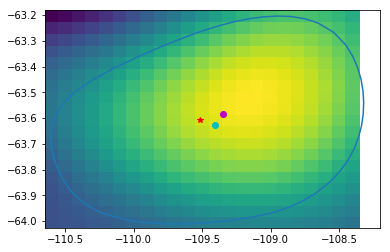

In [138]:
#check time in plot

pcolormesh(x[idxcheckmin:idxcheckmax+1],y[idycheckmin:idycheckmax+1],var[date,idycheckmin:idycheckmax+1,idxcheckmin:idxcheckmax+1])
contourf(x[idxcheckmin:idxcheckmax+1],y[idycheckmin:idycheckmax+1],var[date,idycheckmin:idycheckmax+1,idxcheckmin:idxcheckmax+1])
plot(eddytd['eddyn_5']['contour'][0][0],eddytd['eddyn_5']['contour'][0][1])
plot(eddytd['eddyn_5']['position'][0],eddytd['eddyn_5']['position'][1],'mo')
plot(eddytd['eddyn_5']['position_eddy'][0],eddytd['eddyn_5']['position_eddy'][1],'co')
plot(x_c,y_c,'*r')

In [125]:
x_c,y_c=centroidvalue(contcoordx,contcoordy,var,x,y,levels,date)

In [123]:
def centroidvalue(contcoordx,contcoordy,var,x,y,levels,date):
    idxcheckmax,idycheckmax=find2d(x,y,contcoordx.max(),contcoordy.max())
    idxcheckmin,idycheckmin=find2d(x,y,contcoordx.min(),contcoordy.min())
    #print(idycheckmin,idycheckmax,idxcheckmin,idxcheckmax)
    if len(np.shape(var))==3:
        if levels[0]>0:
            var[var>levels[0]]==np.nan
        else:
            var[var<levels[0]]==np.nan
        sum_T=np.sum(var[date,idycheckmin:idycheckmax+1,idxcheckmin:idxcheckmax+1])
        sum_X=np.sum(var[date,idycheckmin:idycheckmax+1,idxcheckmin:idxcheckmax+1],axis=0)
        sum_Y=np.sum(var[date,idycheckmin:idycheckmax+1,idxcheckmin:idxcheckmax+1],axis=1)
        XM=0
        for ii in range(len(sum_X)):
            XM=XM+sum_X[ii]*x[idxcheckmin+ii]
        YM=0
        for ii in range(len(sum_Y)):
            YM=YM+sum_Y[ii]*y[idycheckmin+ii]
        xcpos=XM/sum_T
        ycpos=YM/sum_T
    else:
        if levels[0]>0:
            var[var>levels[0]]==np.nan
        else:
            var[var<levels[0]]==np.nan
        sum_T=np.sum(var[idycheckmin:idycheckmax+1,idxcheckmin:idxcheckmax+1])
        sum_X=np.sum(var[idycheckmin:idycheckmax+1,idxcheckmin:idxcheckmax+1],axis=0)
        sum_Y=np.sum(var[idycheckmin:idycheckmax+1,idxcheckmin:idxcheckmax+1],axis=1)
        XM=0
        for ii in range(len(sum_X)):
            XM=XM+sum_X[ii]*x[idxcheckmin+ii]
        YM=0
        for ii in range(len(sum_Y)):
            YM=YM+sum_Y[ii]*y[idycheckmin+ii]
        xcpos=XM/sum_T
        ycpos=YM/sum_T
    coord=[xcpos,ycpos]
    return coord